In [1]:
print("Hello")

Hello


In [2]:
import sys
!{sys.executable} -m pip install numpy

You should consider upgrading via the 'c:\users\michał\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
!{sys.executable} -m pip install matplotlib

You should consider upgrading via the 'c:\users\michał\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install install scikit-learn
#!{sys.executable} -m pip install sklearn

You should consider upgrading via the 'c:\users\michał\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.0.0-py3-none-any.whl (14 kB)


You should consider upgrading via the 'c:\users\michał\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


1 : 113.668 seconds
acceleration 1.000 	 efficiency: 1.000
2 : 58.082 seconds
acceleration 1.957 	 efficiency: 0.979
3 : 39.790 seconds
acceleration 2.857 	 efficiency: 0.952
4 : 30.744 seconds
acceleration 3.697 	 efficiency: 0.924
5 : 24.981 seconds
acceleration 4.550 	 efficiency: 0.910
6 : 21.658 seconds
acceleration 5.248 	 efficiency: 0.875
7 : 19.249 seconds
acceleration 5.905 	 efficiency: 0.844
8 : 17.041 seconds
acceleration 6.670 	 efficiency: 0.834
9 : 15.980 seconds
acceleration 7.113 	 efficiency: 0.790
10 : 14.891 seconds
acceleration 7.633 	 efficiency: 0.763
11 : 14.123 seconds
acceleration 8.048 	 efficiency: 0.732
12 : 13.549 seconds
acceleration 8.389 	 efficiency: 0.699
13 : 13.112 seconds
acceleration 8.669 	 efficiency: 0.667
14 : 12.561 seconds
acceleration 9.049 	 efficiency: 0.646
15 : 12.129 seconds
acceleration 9.372 	 efficiency: 0.625
16 : 11.801 seconds
acceleration 9.632 	 efficiency: 0.602
17 : 11.813 seconds
acceleration 9.622 	 efficiency: 0.566
18 : 

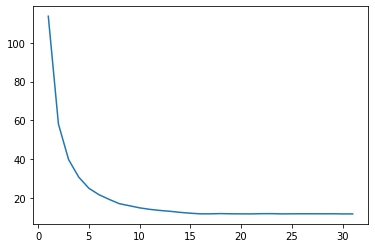

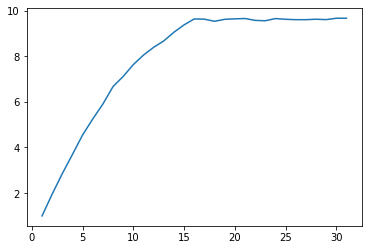

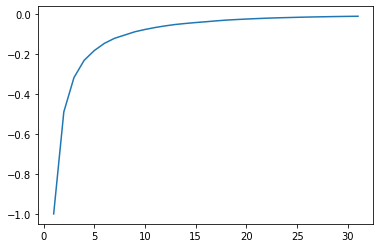

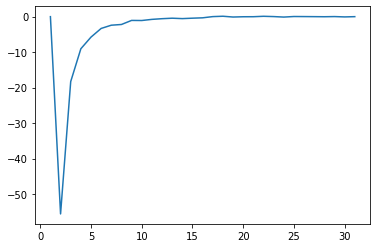

In [5]:
from time import time
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
STEP = 1
# define dataset
X, y = make_classification(n_samples=80000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
n_threads = [x for x in range(1, 32, STEP)]
first_time = 0
results = []
accelerations = []
velocities = []
d_results = [0.0]
for x in n_threads:
    # define the model
    model = RandomForestClassifier(n_estimators=500, n_jobs=x)
    # record current time
    start = time()
    # fit the model
    model.fit(X, y)
    # record current time
    end = time()
    # report execution time
    result = end - start
    if x == 1:
        first_time = result
    print('%d : %.3f seconds' % (x, result))
    print('acceleration %.3f \t efficiency: %.3f' % ((first_time/result), (first_time/(result * x))))
    results.append(result)
    accelerations.append(first_time/result)
    velocities.append(-first_time/(result * x * x))
    if x != 1:
        d_results.append((result - results[x-2])/STEP)

pyplot.plot(n_threads, results)
pyplot.show()

pyplot.plot(n_threads, accelerations)
pyplot.show()

pyplot.plot(n_threads, velocities)
pyplot.show()

pyplot.plot(n_threads, d_results)
pyplot.show()

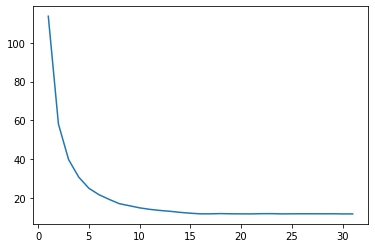

In [6]:
pyplot.plot(n_threads, results)
pyplot.show()

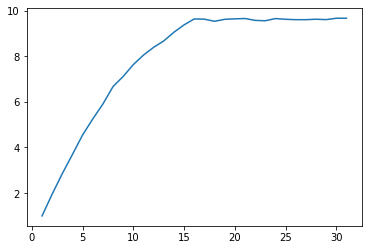

In [7]:
pyplot.plot(n_threads, accelerations)
pyplot.show()

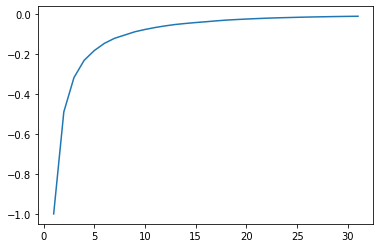

In [8]:
pyplot.plot(n_threads, velocities)
pyplot.show()

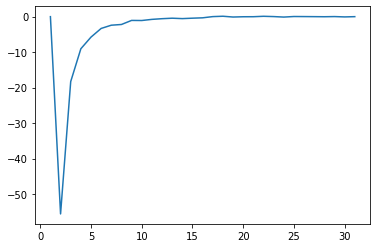

In [9]:
pyplot.plot(n_threads, d_results)
pyplot.show()